In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import keras
from keras import optimizers

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [2]:
data = pd.read_csv("emo_day365.csv")
data = data[['emotion_id']].values
dataset = data.astype('float32')

In [3]:
scaler = MinMaxScaler(feature_range=(1, 50))
dataset = scaler.fit_transform(dataset)

In [96]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [97]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [98]:
look_back = 30

In [99]:
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)

In [100]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [116]:

sgd = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)

TypeError: Unexpected keyword argument passed to optimizer: learning_rate

In [113]:
#BUILD MODEL
model = Sequential()
model.add(LSTM(400, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=50, batch_size=256, verbose=1)

Epoch 1/50
213/213 [==============================] - 1s 7ms/step - loss: 1031.0980 - acc: 0.0376
Epoch 2/50
213/213 [==============================] - 0s 150us/step - loss: 970.2100 - acc: 0.1315
Epoch 3/50
213/213 [==============================] - 0s 150us/step - loss: 913.6865 - acc: 0.0047
Epoch 4/50
213/213 [==============================] - 0s 140us/step - loss: 860.6480 - acc: 0.0000e+00
Epoch 5/50
213/213 [==============================] - 0s 150us/step - loss: 810.6885 - acc: 0.0000e+00
Epoch 6/50
213/213 [==============================] - 0s 145us/step - loss: 763.8492 - acc: 0.0000e+00
Epoch 7/50
213/213 [==============================] - 0s 136us/step - loss: 719.9187 - acc: 0.0000e+00
Epoch 8/50
213/213 [==============================] - 0s 155us/step - loss: 679.2598 - acc: 0.0000e+00
Epoch 9/50
213/213 [==============================] - 0s 145us/step - loss: 641.7483 - acc: 0.0000e+00
Epoch 10/50
213/213 [==============================] - 0s 150us/step - loss: 607.3380 

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [1]:

# convert an array of values into a dataset matrix


look_back = 10


# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#BUILD MODEL
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=256, verbose=2)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

print('ACTUAL '+str(len(trainY[0])))
print(trainY[0])
print('PREDICT '+str(len(trainPredict[:, 0])))
print(trainPredict[:, 0])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Error Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Error Score: %.2f RMSE' % (testScore))

testY_plot = testY[0]
testPredict_plot = testPredict[:, 0]

plt.plot( testY_plot, color='red', marker='o', label='ACTUAL', linestyle = 'None')
plt.plot( testPredict_plot, color='blue', marker='X', label='PREDICT', linestyle = 'None')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('RNN')
plt.legend()

plt.show()

Using TensorFlow backend.


      date_id          datetime_id    market  rpt_key        last    diff_24h  \
0  2017-05-31  2017-06-01 00:00:00  bitstamp  btc_eur     1996.72     2029.99   
1  2017-05-31  2017-06-01 00:00:00  bitflyer  btc_jpy   267098.00   269649.00   
2  2017-05-31  2017-06-01 00:00:00    korbit  btc_krw  3003500.00  3140000.00   
3  2017-05-31  2017-06-01 00:00:00  bitstamp  btc_usd     2237.40     2239.37   
4  2017-05-31  2017-06-01 00:00:00    okcoin  btc_usd     2318.82     2228.70   

   diff_per_24h         bid         ask         low        high        volume  \
0     -1.638924     2005.50     2005.56     1950.00     2063.73   2314.500750   
1     -0.946045   267124.00   267267.00   267124.00   267267.00  70922.880112   
2     -4.347134  3003500.00  3004000.00  3002000.00  3209500.00   6109.752872   
3     -0.087971     2233.09     2237.40     2154.28     2293.46  13681.282017   
4      4.043613     2319.40     2319.99     2129.78     2318.82   4241.641516   

            created_at    

[2280.3142 2329.5374 2283.47   2338.1838 2287.4255 2345.9495 2290.4768
 2354.6116 2292.5093 2354.9915 2293.378  2352.6091 2291.4233 2348.659
 2290.9597 2344.4932 2290.8416 2343.396  2289.8984 2341.983  2289.8147
 2343.0503 2290.1685 2343.1567 2292.3438 2344.7463 2294.6304 2345.6577
 2299.1777 2348.5042 2302.1226 2349.2698 2306.624  2349.3484 2307.1938
 2350.5793 2307.8394 2351.8533 2308.1965 2353.034  2308.9924 2353.6165
 2309.1672 2355.1812 2309.172  2356.6023 2310.3335 2358.8286 2312.5493
 2363.3625 2312.1895 2366.2803 2313.6196 2371.164  2317.9807 2376.293
 2321.94   2382.8462 2325.2397 2383.6223 2327.5063 2381.92   2330.2676
 2381.3945 2331.0889 2380.3079 2331.1072 2379.9724 2331.02   2377.9268
 2329.8877 2378.43   2328.1675 2377.3853 2327.1401 2377.09   2327.6086
 2377.4065 2328.5154 2377.7131 2329.9075 2378.0737 2331.629  2378.0862
 2332.5576 2377.4048 2332.7537 2376.9585 2333.6663 2376.1094 2334.6094
 2376.7126 2336.7065 2377.8723 2336.8997 2378.7737 2337.3242 2379.795
 2336.465

<Figure size 640x480 with 1 Axes>

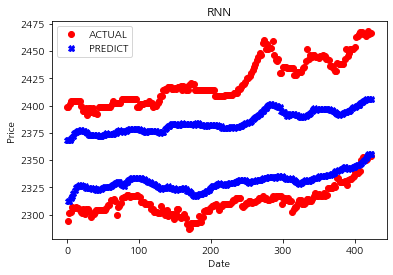

In [5]:
testY_plot = testY[0]
testPredict_plot = testPredict[:, 0]

plt.plot( testY_plot, color='red', marker='o', label='ACTUAL', linestyle = 'None')
plt.plot( testPredict_plot, color='blue', marker='X', label='PREDICT', linestyle = 'None')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('RNN')
plt.legend()
plt.show()